In [10]:
%matplotlib inline
import csv
import numpy as np
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


TRAIN_FILE_PATH = "data/X_test.csv"
TARGET_FILE_PATH =  "data/y_train.csv"

In [2]:
def add_target(path, data):
    target =  pd.read_csv(path)
    return data.merge(target, left_on='id', right_on='id', how="left", validate="1:1")

In [16]:
train_data = pd.read_csv(TRAIN_FILE_PATH)
print("Amount of features: {}".format(len(list(train_data)) - 1)) # -1 due to id
# add target to dataframe
train_data = add_target(TARGET_FILE_PATH, train_data)

print("Amount of observations: {}".format(len(train_data.index)))
print("Min age: {} Max age: {}".format(train_data["y"].min(), train_data["y"].max()))

Amount of features: 887
Amount of observations: 776
Min age: 42.0 Max age: 96.0


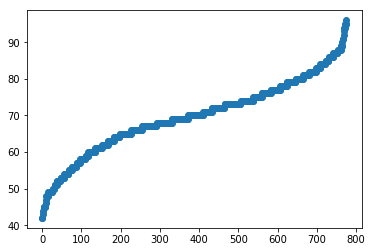

In [6]:
temp = train_data.sort_values(by=['y']).reset_index(drop=True)
y = temp["y"]
x = range(len(y))
plt.scatter(x, y)

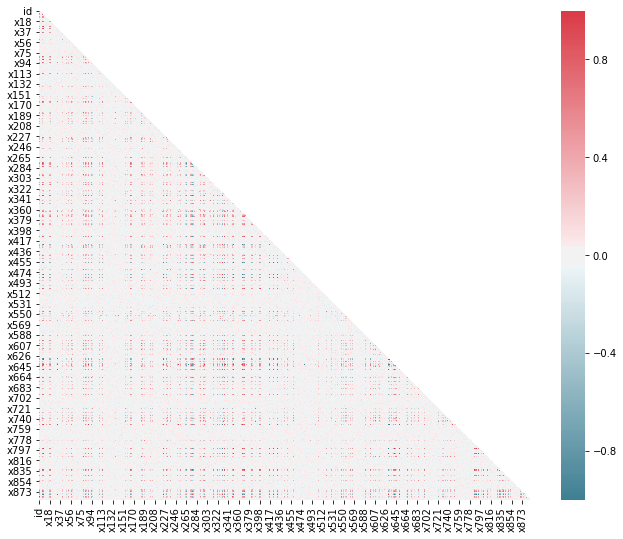

In [9]:
# Compute the correlation matrix
corr = train_data.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap)

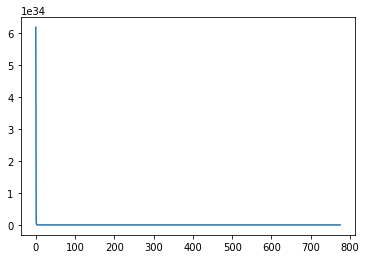

In [18]:
pca = PCA()
temp = train_data.fillna(99999999999999)
pca.fit(temp)
eigenvalues = pca.explained_variance_

plt.plot(eigenvalues)



In [ ]:
for i in range(887):
    key = "x{}".format(i)
    